# Advanced Data Analysis - week 2 examples and exercises

In the advanced data analysis course, we assume basic knowledge of Python, as could be acquired by attending the *Introduction to Programming* bridging course.

This notebook includes the examples presented in lecture of **Week 2** and additional exercises.

In **week 2**, we will focus mainly on time series ans statistics over time series.


[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


In [1]:
# imports pandas
import pandas as pd

import os


## Moving averages

The moving average allows to smooth a line, by taking the average of multiple values instead of the values themselves.


Consider the following dataset.

In [2]:
data = pd.DataFrame( { "day": ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"] , \
                            "value": [10, 11, 13, 16, 20, 25, 31, 38, 46, 55]})

print( data)


  day  value
0   1     10
1   2     11
2   3     13
3   4     16
4   5     20
5   6     25
6   7     31
7   8     38
8   9     46
9  10     55


Consider we have a sequence of values \\(v_1, \dots, v_n\\), the **moving average** of length \\(k\\), is computed as:

\\[MA_k(t) = \frac{v_{t-k+1} + \dots + v_{t}}{k} = \frac{1}{k} \sum_{i=t-k-1}^{k} v_i\\]

Intuitively, we take an element and the \\(k-1\\) elements before in the sequence and compute the mean.

In the **centered moving average** (or central moving average), we take \\(k\\) element, but we assign the value to the center of the values used.

\\[CMA_k(t) = \frac{v_{t-\frac{k-1}{2}} + \dots + v_{t+\frac{k-1}{2}}}{k} = \frac{1}{k} \sum_{i=t-\frac{k-1}{2}}^{i=t-\frac{k-1}{2}} v_i\\]

When \\(k\\) is an even integer, the center is not an integer - e.g. for \\(k = 6\\), when taking days 1 to 6, the computed value should be assigned to \\(\frac{6+1}{2} = 3.5\\). But our table has no possition **3.5**.

What to do?

The most correct approach is to compute the moving average for days 1 to 6, and days 2 to 7, and then assign the average of both moving averages to day **4**, as shown in the following table:

|day|value|CMA|CMA|
|---|-----|---|---|
|1 | 10 | | |
| | | | |			
| 2 | 11 | | |		
| | | | |			
| 3 | 13 | | |
| | | 15.83333333 | |	
| 4 | 16 | | 17.58333333 |
| | | 19.33333333 | |
| 5 | 20 | | 21.58333333 |
| | | 23.83333333 | |
| 6 | 25 | | 26.58333333 |
| | | 29.33333333 | |
| 7 | 31 | | 32.58333333 |
| | | 35.83333333 | |	
| 8 | 38 | | |
| | | | |
| 9 | 46 | | |
| | | | |
| 10 | 55 | | |


We now show how to compute the centered moving average and the moving average usng Pandas ```rolling``` function.

The ```dataframe.rolling( window, center=True/False)``` defines a rolling window of size **window** that can be centered or not. For each window, an aggregation function can be computed - e.g. ```mean```computed the moving average, while ```max``` will compute the moving maximum.

When the size of window is even, Pandas simply assigns the computed value to the next integer - in the previous example, the moving average assigned to 4 is **15.8333333**.

See [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) for more options.

In [3]:
data["centerMA"] = data["value"].rolling(7,center=True).mean()
data["simpleMA"] = data["value"].rolling(7,center=False).mean()

print(data)

  day  value  centerMA  simpleMA
0   1     10       NaN       NaN
1   2     11       NaN       NaN
2   3     13       NaN       NaN
3   4     16      18.0       NaN
4   5     20      22.0       NaN
5   6     25      27.0       NaN
6   7     31      33.0      18.0
7   8     38       NaN      22.0
8   9     46       NaN      27.0
9  10     55       NaN      33.0


In [4]:
data["centerMA"] = data["value"].rolling(6,center=True).mean()
data["simpleMA"] = data["value"].rolling(6,center=False).mean()

print(data)

  day  value   centerMA   simpleMA
0   1     10        NaN        NaN
1   2     11        NaN        NaN
2   3     13        NaN        NaN
3   4     16  15.833333        NaN
4   5     20  19.333333        NaN
5   6     25  23.833333  15.833333
6   7     31  29.333333  19.333333
7   8     38  35.833333  23.833333
8   9     46        NaN  29.333333
9  10     55        NaN  35.833333


In [5]:
# Let's set the values with windows of length 7
data["centerMA"] = data["value"].rolling(7,center=True).mean()
data["normalMA"] = data["value"].rolling(7,center=False).mean()

### Weighted moving average

In financial analysis, it is common to compute moving average, but assigning different weights to the values used in the computation. In financial analysis, the weights are usually \\(1,2,...,k\\), leading to the following formula:

\\[WMA_k(t) = \frac{1 \times v_{t-k+1} + \dots + k \times v_{t}}{1+\ldots+k}\\]


Pandas has no function to immediatelly compute the weighted moving average, but you can compute an weighted moving average by defining your own function.

In the following code, ```lambda x: sum(weights*x)```, defines a lambda function (i.e., a function without name), that will be applied to every window. The window is received in the value ```x```, and the result of the function is the sum of multiplying each value of the window by the defined weights. 


In [6]:
weights=[1,2,3,4,5,6,7]

data["weightedMA"] = data["value"].rolling(7).apply(lambda x: sum(weights*x)/sum(weights)) 

print(data)


  day  value  centerMA   simpleMA  normalMA  weightedMA
0   1     10       NaN        NaN       NaN         NaN
1   2     11       NaN        NaN       NaN         NaN
2   3     13       NaN        NaN       NaN         NaN
3   4     16      18.0        NaN       NaN         NaN
4   5     20      22.0        NaN       NaN         NaN
5   6     25      27.0  15.833333       NaN         NaN
6   7     31      33.0  19.333333      18.0        21.5
7   8     38       NaN  23.833333      22.0        26.5
8   9     46       NaN  29.333333      27.0        32.5
9  10     55       NaN  35.833333      33.0        39.5


The weighted average could be computed also using a normal function. In this case, apply receives two parameters, the name of the function - *wma* - , and the additional arguments to pass to the funcion - a single one, the weights in this case: *((weights,))*

In [7]:
def wma( vals, ws):
    return sum(vals*ws)/sum(ws)

weights=[1,2,3,4,5,6,7]
data["weightedFunMA"] = data["value"].rolling(7).apply(wma,args=((weights,)))

print(data)


  day  value  centerMA   simpleMA  normalMA  weightedMA  weightedFunMA
0   1     10       NaN        NaN       NaN         NaN            NaN
1   2     11       NaN        NaN       NaN         NaN            NaN
2   3     13       NaN        NaN       NaN         NaN            NaN
3   4     16      18.0        NaN       NaN         NaN            NaN
4   5     20      22.0        NaN       NaN         NaN            NaN
5   6     25      27.0  15.833333       NaN         NaN            NaN
6   7     31      33.0  19.333333      18.0        21.5           21.5
7   8     38       NaN  23.833333      22.0        26.5           26.5
8   9     46       NaN  29.333333      27.0        32.5           32.5
9  10     55       NaN  35.833333      33.0        39.5           39.5


We can do some printing inside function ```wma``` to check the type of parameters and how many times it is being called.

In [8]:
def wma( vals, ws):
    print( "Function wma called with vals of type " + str(type(vals)) + " with "  + str(vals.size) + " elements")
    return sum(vals*ws)/sum(ws)

weights=[1,2,3,4,5,6,7]
data["weightedFunMA"] = data["value"].rolling(7).apply(wma,args=((weights,)))

print(data)


Function wma called with vals of type <class 'pandas.core.series.Series'> with 7 elements
Function wma called with vals of type <class 'pandas.core.series.Series'> with 7 elements
Function wma called with vals of type <class 'pandas.core.series.Series'> with 7 elements
Function wma called with vals of type <class 'pandas.core.series.Series'> with 7 elements
  day  value  centerMA   simpleMA  normalMA  weightedMA  weightedFunMA
0   1     10       NaN        NaN       NaN         NaN            NaN
1   2     11       NaN        NaN       NaN         NaN            NaN
2   3     13       NaN        NaN       NaN         NaN            NaN
3   4     16      18.0        NaN       NaN         NaN            NaN
4   5     20      22.0        NaN       NaN         NaN            NaN
5   6     25      27.0  15.833333       NaN         NaN            NaN
6   7     31      33.0  19.333333      18.0        21.5           21.5
7   8     38       NaN  23.833333      22.0        26.5           26.5
8

### Exponential moving average

A special type of weighted moving average is the exponential moving average. In this case, the weighting factors decrease exponentially. 

\\[EMA(t) = \alpha . v_{t} + \alpha . (1-\alpha) . v_{t-1} +  \alpha . (1-\alpha)^2 . v_{t-2} + \ldots \textrm{, with } \alpha \in ]0,1] \\]


The following figures show shows example of the weight decrease, with different values of \\(\alpha\)).

![wma](images/week2-wma.png)


Pandas has a special function to compute exponetial weighted (EW) functions - the function ```dataframe.ewm(com)```, with **com** the value of \\(\alpha\\) to be used, defines a exponential moving window on which it is possible to define statistical operations.

Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html) for more options.

The following example show the exponential moving average.


In [9]:
data["EMA"] = data["value"].ewm(com=0.2).mean()

print(data)


  day  value  centerMA   simpleMA  normalMA  weightedMA  weightedFunMA  \
0   1     10       NaN        NaN       NaN         NaN            NaN   
1   2     11       NaN        NaN       NaN         NaN            NaN   
2   3     13       NaN        NaN       NaN         NaN            NaN   
3   4     16      18.0        NaN       NaN         NaN            NaN   
4   5     20      22.0        NaN       NaN         NaN            NaN   
5   6     25      27.0  15.833333       NaN         NaN            NaN   
6   7     31      33.0  19.333333      18.0        21.5           21.5   
7   8     38       NaN  23.833333      22.0        26.5           26.5   
8   9     46       NaN  29.333333      27.0        32.5           32.5   
9  10     55       NaN  35.833333      33.0        39.5           39.5   

         EMA  
0  10.000000  
1  10.857143  
2  12.651163  
3  15.444015  
4  19.241158  
5  24.040296  
6  29.840070  
7  36.640016  
8  44.440003  
9  53.240001  


### Which moving average to use?

There is no general rule to decide which moving average to use - it tends to be domain-specific and depends on the problem to be solved and the properties of the data that you have.

Regarding using a centered moving average or not, one thing to consider is that using a centered moving average, you will not have results for the last data elements you have.


## Correlations

In statistics, correlation is any statistical relationship between two random variables. Correlation is commonly used to refer to the degree to which a pair of variable are lineraly related. 

Let's plot the COVID data for Portugal again.



<Axes: xlabel='date'>

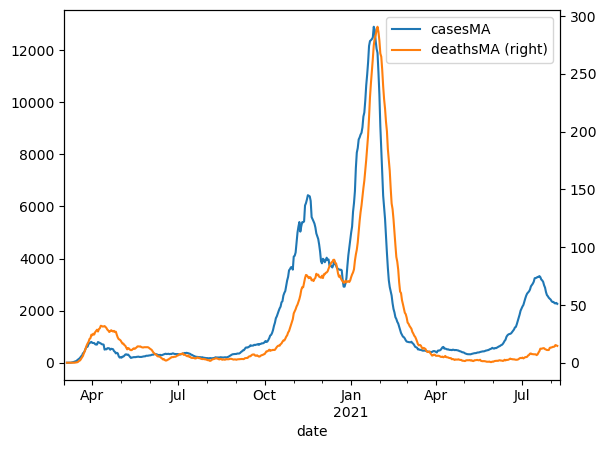

In [10]:
ptCovidFileName = os.path.join( "data", "PT-covid.csv")

ptCovidDF = pd.read_csv(ptCovidFileName)

# Converts the date into the datetime type
ptCovidDF["date"] = pd.to_datetime(ptCovidDF["date"], format="%Y-%m-%d")

ptCovidDF["casesMA"] = ptCovidDF["cases"].rolling(7,center=True).mean()
ptCovidDF["deathsMA"] = ptCovidDF["deaths"].rolling(7,center=True).mean()

ptCovidDF.plot(x="date",y=["casesMA","deathsMA"],secondary_y=["deathsMA"])


Intuitively, looking at the data, it seems that the cases and deaths are correlated.

Several methods to define the correlation have been propose. The Pearson's correlation coefficient of two variables X and Y is computed by taking the ratio of the covariance of the two variables, normalized to the square root of their variances:

\\[corr(X,Y) = \frac{cov(X,Y)}{\sigma_{X} . \sigma_{Y}}\\]

with \\(\sigma_{X}\\) and \\(\sigma_{Y}\\) the standard deviation of X and Y.

The value of 1 represents a perfect correlation, in which the two variable move in tandem, i.e., in the same direction. The correlation value of 0 represent the no correlation and the value of -1 represents the perfect negative correlation, in which when one variable increases the other decreases.



In Pandas, ```dataframe.corr()```allows to compute the correlation between the columns of the dataframe.


Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) for more options.

The following code computes and prints the correlation between the moving average values of cases and deaths.

In [11]:
corrVals = ptCovidDF[["casesMA","deathsMA"]].corr()

print(corrVals)


           casesMA  deathsMA
casesMA   1.000000  0.867135
deathsMA  0.867135  1.000000


In [12]:
m = pd.DataFrame( { "v1": [10,12,16,17,100] , \
                            "v2": [110,111,112,113,114]})
m[["v1","v2"]].corr()

,v1,v2
v1,1.000000,0.756268
v2,0.756268,1.000000


One question that is often made is whether vaccines have broken the correlation between cases and deaths.

Althoug vaccination started in the begining of the year 2021, only after about two months the number of vaccinated persons became significative. So, let's compute the correlation for the periods before and after 1-March-2021.

In [13]:
print("Before 2021-03-01")
ptCovidBeforeVaxDF = ptCovidDF[ptCovidDF["date"] < '2021-03-01'][["casesMA","deathsMA"]]
print(ptCovidBeforeVaxDF.corr())

print()
print("After 2021-03-01")
ptCovidAfterVaxDF = ptCovidDF[ptCovidDF["date"] >= '2021-03-01'][["casesMA","deathsMA"]]
print(ptCovidAfterVaxDF.corr())

Before 2021-03-01
           casesMA  deathsMA
casesMA   1.000000  0.884622
deathsMA  0.884622  1.000000

After 2021-03-01
           casesMA  deathsMA
casesMA   1.000000  0.183936
deathsMA  0.183936  1.000000


The values seem to show that the correlation is smaller. One can expect that when all persons are vaccinated, the correlation between cases and deaths returns. Let's look at data since June shows.

In [14]:
print("After 2021-06-01")
ptCovidAfterJuneDF = ptCovidDF[ptCovidDF["date"] >= '2021-06-01'][["casesMA","deathsMA"]]
print(ptCovidAfterJuneDF.corr())

After 2021-06-01
          casesMA  deathsMA
casesMA    1.0000    0.7329
deathsMA   0.7329    1.0000


### Shifted correlation

Sometimes, two variables are related but effects are not immediate. In our example, we can expect to observe a delay between cases and deaths resulting from COVID. 

To compute a shifted correlation in Pandas, we need to select the two table to correlate.

Let's computed the correlation shifted by 12 days (why 12? there are some statistics showing that the aveerage time untila COVID death is 12) - the following code does not use the 12 first lines of deaths (and the 12 last lines of cases).

It starts by creating the necessary tables, using the function ``dataframe.iloc[st:end]``, which allows to select a subset of the rows.

As we want the correlation to compare the \\(n^{th}\\) row of one table with the \\(n^{th}\\) row of the other table, we need to reset the index, strting with 0 for the first row in each table. Tbhis can be done using ``dataframe.reset_index(drop=True)``, with the option saying that we do not want to keep the previous index.


In [15]:
cases = ptCovidDF[["casesMA"]].iloc[:-12]
cases = cases.reset_index(drop=True)
deaths = ptCovidDF[["deathsMA"]].iloc[12:]
deaths = deaths.reset_index(drop=True)

shiftCorrVal = cases.corrwith(deaths["deathsMA"])
print("Correlation value is " + str(shiftCorrVal["casesMA"]))


Correlation value is 0.9267795600905065


The result seems to confirm that there is a delay, with the value of correlation increasing.

We can now try to verify what value for the hift maximizes the correlation. To this end, we can repeat the previous computation for different values of the delay.


In [16]:
for i in range(30):
    cases = ptCovidDF[["casesMA"]].iloc[:-i]
    cases = cases.reset_index(drop=True)
    deaths = ptCovidDF[["deathsMA"]].iloc[i:]
    deaths = deaths.reset_index(drop=True)
    
    shiftCorrVal = cases.corrwith(deaths["deathsMA"])
    print("Correlation for " + str(i) + " days interval is " + str(shiftCorrVal["casesMA"]))


Correlation for 0 days interval is nan
Correlation for 1 days interval is 0.8859044671644103
Correlation for 2 days interval is 0.9023561162279522
Correlation for 3 days interval is 0.9162927964308744
Correlation for 4 days interval is 0.9275906208847553
Correlation for 5 days interval is 0.9362086029618647
Correlation for 6 days interval is 0.942203836127924
Correlation for 7 days interval is 0.9456832374837801
Correlation for 8 days interval is 0.9466763750161786
Correlation for 9 days interval is 0.9450597576124259
Correlation for 10 days interval is 0.9410856278570441
Correlation for 11 days interval is 0.9349682978655205
Correlation for 12 days interval is 0.9267795600905065
Correlation for 13 days interval is 0.9165979067893756
Correlation for 14 days interval is 0.9046626973817848
Correlation for 15 days interval is 0.8910200083602213
Correlation for 16 days interval is 0.8759436808230975
Correlation for 17 days interval is 0.8594591082853511
Correlation for 18 days interval is 

## Exercises

File **countries.csv** has information on countries, including the continent.

Using this file and compute and plot statistics on cases and deaths by 

In [17]:
countriesInfoFileName = os.path.join( "data", "countries.csv")

# Read a CSV file into a DataFrame
countriesInfoDF = pd.read_csv(countriesInfoFileName)

# Print the first 5 lines of data
print(countriesInfoDF.head(5))


  Continent_Name Continent_Code                                  Country_Name  \
0           Asia             AS              Afghanistan, Islamic Republic of   
1         Europe             EU                          Albania, Republic of   
2     Antarctica             AN  Antarctica (the territory South of 60 deg S)   
3         Africa             AF      Algeria, People's Democratic Republic of   
4        Oceania             OC                                American Samoa   

  Two_Letter_Country_Code Three_Letter_Country_Code  Country_Number  
0                      AF                       AFG             4.0  
1                      AL                       ALB             8.0  
2                      AQ                       ATA            10.0  
3                      DZ                       DZA            12.0  
4                      AS                       ASM            16.0  


### Exercise 1

Based on the data in the **ALL-covid.csv** and **countries.csv**, compute and plot information on COVID by continent.


    Continent_Name Continent_Code                      Country_Name  \
0             Asia             AS  Afghanistan, Islamic Republic of   
0             Asia             AS  Afghanistan, Islamic Republic of   
0             Asia             AS  Afghanistan, Islamic Republic of   
0             Asia             AS  Afghanistan, Islamic Republic of   
0             Asia             AS  Afghanistan, Islamic Republic of   
..             ...            ...                               ...   
257         Africa             AF               Zambia, Republic of   
258        Oceania             OC                Disputed Territory   
259           Asia             AS    Iraq-Saudi Arabia Neutral Zone   
260           Asia             AS       United Nations Neutral Zone   
261           Asia             AS                   Spratly Islands   

    Two_Letter_Country_Code Three_Letter_Country_Code  Country_Number  \
0                        AF                       AFG             4.0   
0

AttributeError: module 'matplotlib' has no attribute 'show'

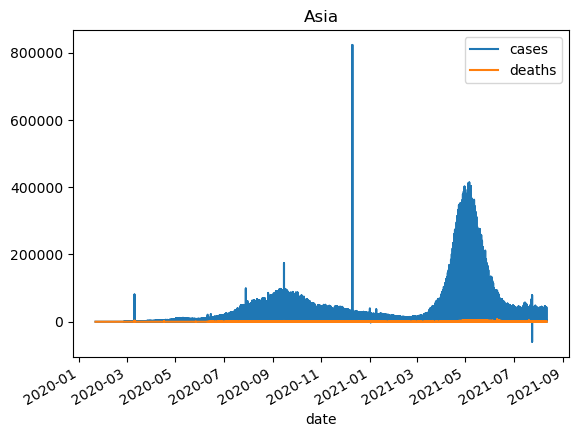

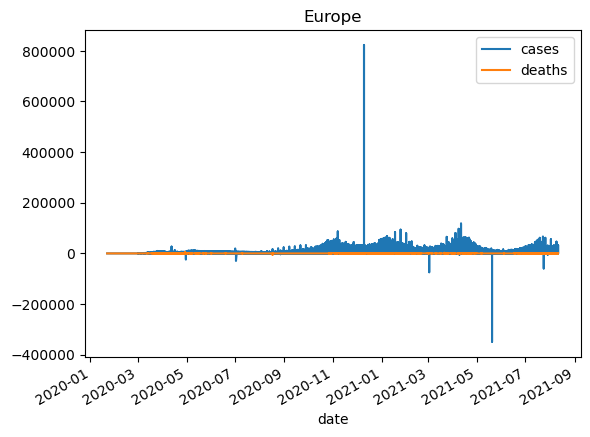

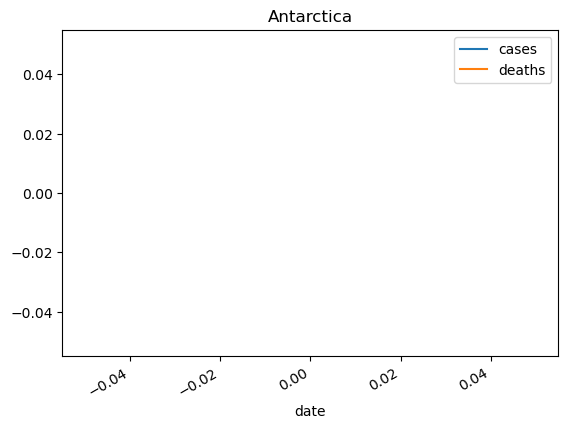

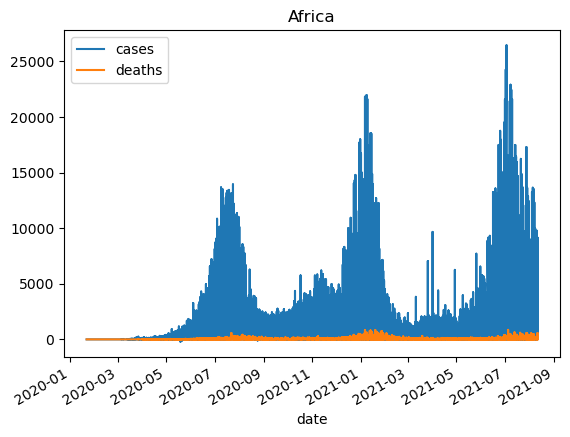

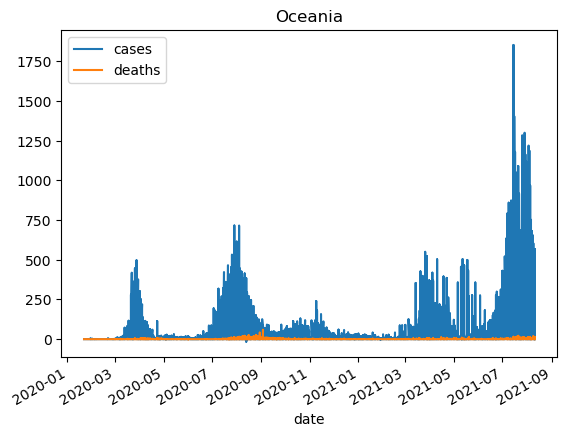

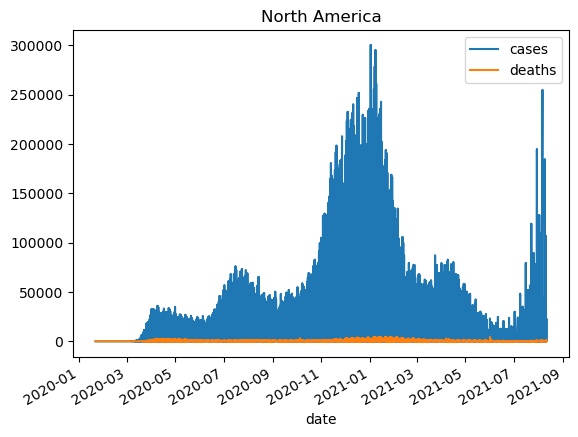

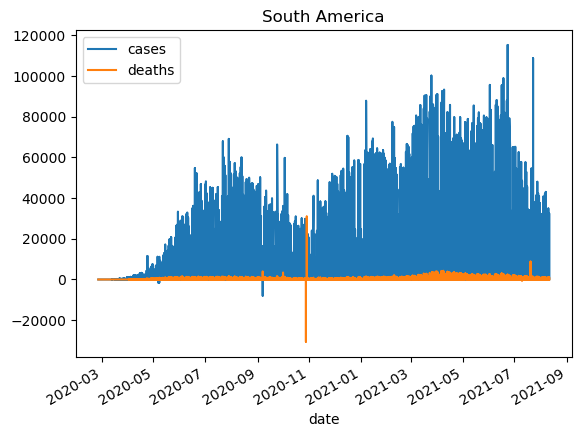

In [22]:
import matplotlib as plt
covidInfoFileName = os.path.join("data", "ALL-covid.csv")

# Read a CSV file into a DataFrame
covidInfoDF = pd.read_csv(covidInfoFileName)

# Join the two dataFrames
together = countriesInfoDF.join(covidInfoDF.set_index("countrycode"), on = "Two_Letter_Country_Code")

# Converts the date into the datetime type
together["date"] = pd.to_datetime(together["date"], format="%Y-%m-%d")
print(together)

# plot cases and deaths
continents = together["Continent_Name"].unique()
for continent in continents:
    data = together.loc[together["Continent_Name"] == continent]
    data.plot(kind = "line", x="date",y=["cases","deaths"], title = continent)
plt.show()

### Exercise 2

Select at least four countries - find which pair of countries have shown a more direct correlation for the cases of COVID.